# Mini-project-1: Online sales data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
url = r"C:\Users\rohan\OneDrive\Desktop\Jupyter Projects\Notes\CSV Files\sample_online_sales_data.csv"
df = pd.read_csv(url)

In [9]:
df.head()

,Month,Product,Region,Sales,Website_Visitors,Inventory_Status
0,January,Monitor,North,5816,4092,In Stock
1,January,Headphones,East,4077,1330,In Stock
2,January,Keyboard,West,5589,4380,Out of Stock
3,January,Monitor,South,3606,3853,In Stock
4,January,Monitor,North,7194,3300,In Stock


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             600 non-null    object
 1   Product           600 non-null    object
 2   Region            600 non-null    object
 3   Sales             600 non-null    int64 
 4   Website_Visitors  600 non-null    int64 
 5   Inventory_Status  600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [15]:
print("\n The missing values in each columns is : ")
print(df.isnull().sum())


 The missing values in each columns is : 
Month               0
Product             0
Region              0
Sales               0
Website_Visitors    0
Inventory_Status    0
dtype: int64


In [17]:
monthly_sales = df.groupby('Month')['Sales'].sum()

In [18]:
monthly_sales

Month
April       496032
February    490787
January     478121
June        504120
March       496990
May         489206
Name: Sales, dtype: int64

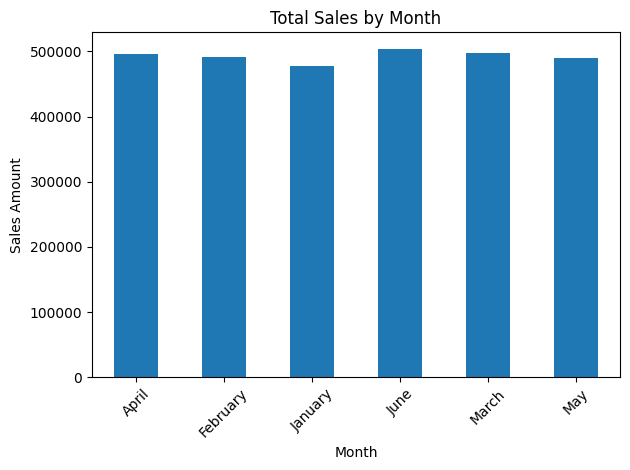

In [24]:
monthly_sales.plot(kind='bar', title = 'Total Sales by Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
monthly_traffic = df.groupby('Month')['Website_Visitors'].mean()
print("\nAverage website visitors by month:")
print(monthly_traffic)


Average website visitors by month:
Month
April       3047.12
February    3022.11
January     3025.55
June        2989.22
March       3084.63
May         2948.92
Name: Website_Visitors, dtype: float64


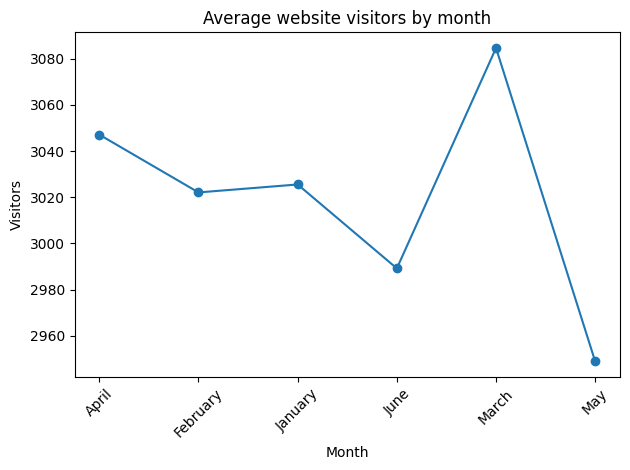

In [35]:
monthly_traffic.plot(kind='line', marker='o', title='Average website visitors by month')
plt.ylabel('Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
june_stock = df[(df['Month'] == 'June') & (df['Inventory_Status'] == 'Out of Stock')]
stock_counts = june_stock['Product'].value_counts()
print("\nOut-of-stock products in June:")
print(stock_counts)



Out-of-stock products in June:
Product
Laptop        19
Smartphone    16
Headphones     2
Mouse          1
Keyboard       1
Name: count, dtype: int64


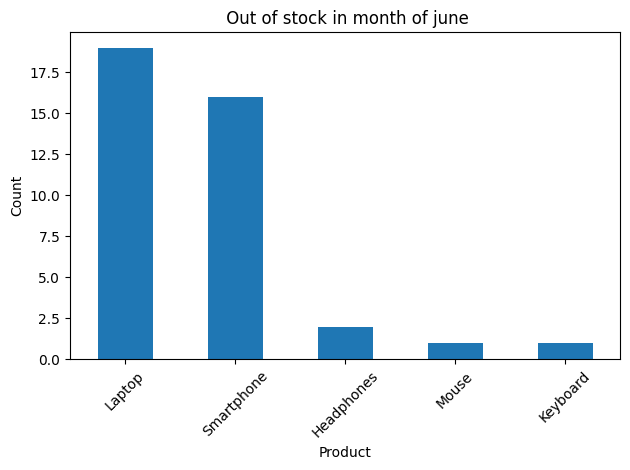

In [39]:
stock_counts.plot(kind='bar', title = ' Out of stock in month of june')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
may_sales = df[df['Month'] == 'May'].groupby('Product')['Sales'].sum()
june_sales = df[df['Month'] == 'June'].groupby('Product')['Sales'].sum()

In [41]:
comparison = pd.DataFrame({
    'May': may_sales,
    'June': june_sales
})

In [44]:
print("\nSales Comparison (May vs June):")
print(comparison)


Sales Comparison (May vs June):
               May    June
Product                   
Headphones   47414   62644
Keyboard     54737   71195
Laptop       96074   94760
Monitor     125661  107289
Mouse        93303   84161
Smartphone   72017   84071


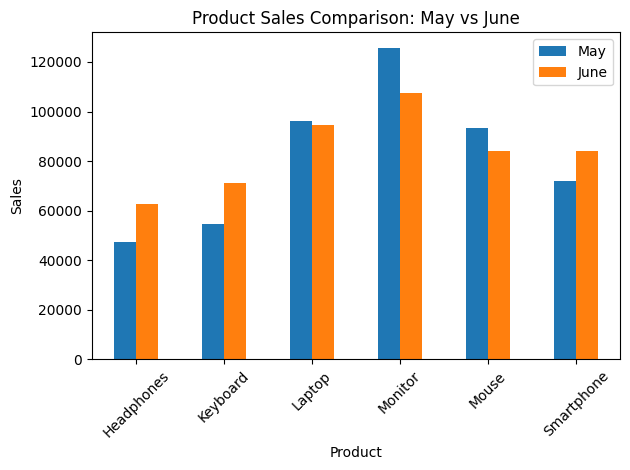

In [45]:
comparison.plot(kind='bar', title='Product Sales Comparison: May vs June')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Conclusion:
### - Website traffic dropped slightly in June.
### - Laptops and Smartphones were frequently out of stock.
### - Some key products saw a drop in sales.